# proyecto final de curso de machine learning 


## preprocesamiento 

In [ ]:
!pip install tensorflow

In [ ]:
!pip install efficientnet


In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.applications import ResNet50
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


### creacion del archivo.csv

In [2]:
def cargar_imagen(ruta):
    imagen = Image.open(ruta)
    # Realizar cualquier preprocesamiento necesario aquí
    # Por ejemplo, cambiar el tamaño, normalizar píxeles, etc.
    imagen = imagen.resize((150, 150))  # Ajusta el tamaño según sea necesario
    imagen = np.array(imagen)
    return imagen


# creamos los dataframe tanto de tuberculos como de cortes

In [5]:
carpeta_principal = r'C:\Users\Username\Desktop\UNSAAC\2023-2\machine learning\proyect final\CORTES' # aqui modificamo la carpeta de las imagenes
extensiones_validas = ['.jpg', '.png', '.jpeg']  # Ajusta según las extensiones de tus imágenes

datosCorte = []

for etiqueta in os.listdir(carpeta_principal):
    carpeta_etiqueta = os.path.join(carpeta_principal, etiqueta)
    
    if os.path.isdir(carpeta_etiqueta):
        for archivo in os.listdir(carpeta_etiqueta):
            if archivo.lower().endswith(tuple(extensiones_validas)):
                ruta_completa = os.path.join(carpeta_etiqueta, archivo)
                imagen = cargar_imagen(ruta_completa)
                datosCorte.append({'ruta': ruta_completa, 'imagen': imagen, 'etiqueta': etiqueta})

# Crear DataFrame
df_Corte = pd.DataFrame(datosCorte)

label_encoder = LabelEncoder()
df_Corte['etiqueta_encoded'] = label_encoder.fit_transform(df_Corte['etiqueta'])
# Guardar en CSV
df_Corte.to_csv('cortes_train.csv', index=False)


## verificamos la correcta codificacion

In [6]:

num_etiquetas2 = df_Corte['etiqueta'].nunique()
print(f'Número de etiquetas únicas en tuberculos: {num_etiquetas2}')



Número de etiquetas únicas en tuberculos: 15


# Empezamos con la implementacion de los modelos


In [7]:
X = np.array([np.array(im) for im in df_Corte['imagen']]) / 255.0
y = df_Corte['etiqueta_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODELOS

In [24]:
# Regresión Logística
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train.reshape(-1, 150 * 150 * 3), y_train)
lr_pred = lr_model.predict(X_test.reshape(-1, 150 * 150 * 3))

C:\Users\Username\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Árbol de Decisión
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train.reshape(-1, 150 * 150 * 3), y_train)
dtree_pred = dtree_model.predict(X_test.reshape(-1, 150 * 150 * 3))

In [45]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train.reshape(-1, 150 * 150 * 3), y_train)
nb_pred = nb_model.predict(X_test.reshape(-1, 150 * 150 * 3))

In [58]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=42)
dt_model.fit(X_train.reshape(-1, 150 * 150 * 3), y_train)
dt_pred = dt_model.predict(X_test.reshape(-1, 150 * 150 * 3))

In [34]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train.reshape(-1, 150 * 150 * 3), y_train)
knn_pred = knn_model.predict(X_test.reshape(-1, 150 * 150 * 3))

In [73]:
# Perceptron (MLP)
mlp_model = models.Sequential()
mlp_model.add(layers.Flatten(input_shape=(150, 150, 3)))
mlp_model.add(layers.Flatten(input_shape=(150, 150, 3)))
mlp_model.add(layers.Dense(128, activation='relu'))
mlp_model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=20, validation_split=0.2)
mlp_pred = np.argmax(mlp_model.predict(X_test), axis=1)

Epoch 1/20
11/11 [==============================] - 2s 96ms/step - loss: 42.4150 - accuracy: 0.1236 - val_loss: 34.2979 - val_accuracy: 0.0909
Epoch 2/20
11/11 [==============================] - 1s 74ms/step - loss: 18.4196 - accuracy: 0.1954 - val_loss: 6.5671 - val_accuracy: 0.2614
Epoch 3/20
11/11 [==============================] - 1s 80ms/step - loss: 5.0962 - accuracy: 0.3448 - val_loss: 4.5232 - val_accuracy: 0.3068
Epoch 4/20
11/11 [==============================] - 1s 75ms/step - loss: 2.4345 - accuracy: 0.4943 - val_loss: 1.4922 - val_accuracy: 0.5909
Epoch 5/20
11/11 [==============================] - 1s 72ms/step - loss: 1.0022 - accuracy: 0.7126 - val_loss: 0.7313 - val_accuracy: 0.8068
Epoch 6/20
11/11 [==============================] - 1s 109ms/step - loss: 0.6687 - accuracy: 0.7989 - val_loss: 0.6770 - val_accuracy: 0.8182
Epoch 7/20
11/11 [==============================] - 1s 106ms/step - loss: 0.4819 - accuracy: 0.8563 - val_loss: 0.5828 - val_accuracy: 0.8182
Epoch 8/

In [69]:
# Red Convolucional
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=20, validation_split=0.2)
cnn_pred = np.argmax(cnn_model.predict(X_test), axis=1)

Epoch 1/20
11/11 [==============================] - 10s 637ms/step - loss: 3.2577 - accuracy: 0.1466 - val_loss: 2.3239 - val_accuracy: 0.2614
Epoch 2/20
11/11 [==============================] - 6s 522ms/step - loss: 1.7429 - accuracy: 0.4569 - val_loss: 0.9061 - val_accuracy: 0.7386
Epoch 3/20
11/11 [==============================] - 6s 506ms/step - loss: 0.5123 - accuracy: 0.8506 - val_loss: 0.7801 - val_accuracy: 0.8068
Epoch 4/20
11/11 [==============================] - 6s 531ms/step - loss: 0.3009 - accuracy: 0.9052 - val_loss: 0.3322 - val_accuracy: 0.9205
Epoch 5/20
11/11 [==============================] - 6s 530ms/step - loss: 0.0913 - accuracy: 0.9799 - val_loss: 0.2543 - val_accuracy: 0.9205
Epoch 6/20
11/11 [==============================] - 6s 561ms/step - loss: 0.0236 - accuracy: 0.9971 - val_loss: 0.2356 - val_accuracy: 0.9432
Epoch 7/20
11/11 [==============================] - 6s 551ms/step - loss: 0.0707 - accuracy: 0.9799 - val_loss: 0.1750 - val_accuracy: 0.9545
Epoch

In [71]:
# Red Preentrenada ResNet50
resnet_model = models.Sequential()
resnet_model.add(layers.Conv2D(3, (1, 1), input_shape=(150, 150, 3), activation='relu'))
resnet_model.add(ResNet50(weights='imagenet', include_top=False, pooling='avg'))
resnet_model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model.fit(X_train, y_train, epochs=10, validation_split=0.2)
resnet_pred = np.argmax(resnet_model.predict(X_test), axis=1)

Epoch 1/10
11/11 [==============================] - 80s 4s/step - loss: 0.9240 - accuracy: 0.7471 - val_loss: 208.9947 - val_accuracy: 0.0909
Epoch 2/10
11/11 [==============================] - 44s 4s/step - loss: 0.1467 - accuracy: 0.9626 - val_loss: 736.7346 - val_accuracy: 0.0909
Epoch 3/10
11/11 [==============================] - 43s 4s/step - loss: 0.3352 - accuracy: 0.9080 - val_loss: 2889.5576 - val_accuracy: 0.0795
Epoch 4/10
11/11 [==============================] - 44s 4s/step - loss: 0.2218 - accuracy: 0.9454 - val_loss: 18.0403 - val_accuracy: 0.0795
Epoch 5/10
11/11 [==============================] - 41s 4s/step - loss: 0.2710 - accuracy: 0.9282 - val_loss: 367.0645 - val_accuracy: 0.0682
Epoch 6/10
11/11 [==============================] - 41s 4s/step - loss: 0.3867 - accuracy: 0.8937 - val_loss: 238.9498 - val_accuracy: 0.0341
Epoch 7/10
11/11 [==============================] - 41s 4s/step - loss: 0.2225 - accuracy: 0.9511 - val_loss: 11.2963 - val_accuracy: 0.0341
Epoch 8

In [16]:
# Red Preentrenada EfficientNet
effnet_model = models.Sequential()
effnet_model.add(layers.Conv2D(3, (1, 1), input_shape=(150, 150, 3), activation='relu'))
effnet_model.add(EfficientNetB0(weights='imagenet', include_top=False, pooling='avg'))
effnet_model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
effnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
effnet_model.fit(X_train, y_train, epochs=10, validation_split=0.2)
effnet_pred = np.argmax(effnet_model.predict(X_test), axis=1)

Epoch 1/10
11/11 [==============================] - 32s 1s/step - loss: 0.8890 - accuracy: 0.7902 - val_loss: 3.7554 - val_accuracy: 0.1136
Epoch 2/10
11/11 [==============================] - 12s 1s/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 4.3567 - val_accuracy: 0.1250
Epoch 3/10
11/11 [==============================] - 12s 1s/step - loss: 0.0335 - accuracy: 0.9885 - val_loss: 6.0510 - val_accuracy: 0.1023
Epoch 4/10
11/11 [==============================] - 11s 1s/step - loss: 0.0315 - accuracy: 0.9885 - val_loss: 5.7604 - val_accuracy: 0.1364
Epoch 5/10
11/11 [==============================] - 11s 1s/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 2.9475 - val_accuracy: 0.2500
Epoch 6/10
11/11 [==============================] - 11s 977ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 2.1928 - val_accuracy: 0.3295
Epoch 7/10
11/11 [==============================] - 11s 994ms/step - loss: 0.0125 - accuracy: 0.9971 - val_loss: 2.1281 - val_accuracy: 0.3636
Epoch 8/10
11/

# VALIDACION 

In [30]:
def evaluar_modelo(y_true, y_pred, modelo_nombre):
    accuracy = accuracy_score(y_true, y_pred)
    matriz_confusion = confusion_matrix(y_true, y_pred)
    print(f'Modelo: {modelo_nombre}')
    print(f'Accuracy: {accuracy}')

    matriz_confusion = confusion_matrix(y_true, y_pred)
    print(f'Modelo: {modelo_nombre}')
    print(f'Accuracy: {accuracy}')
    print('Matriz de Confusión:')
    print(matriz_confusion)
    # Crear una representación visual de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=range(15), yticklabels=range(15))
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title(f'Matriz de Confusión de tuberculos- {modelo_nombre}')
    plt.show()

Modelo: Naive Bayes
Accuracy: 0.7272727272727273


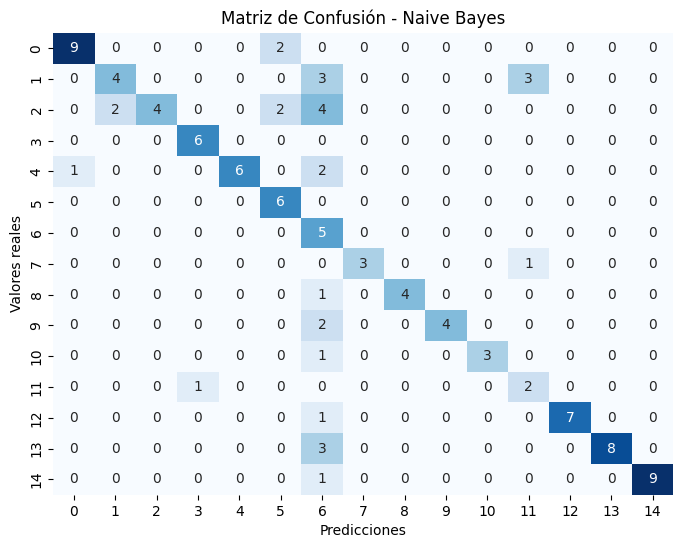

Modelo: Decision Tree
Accuracy: 0.8


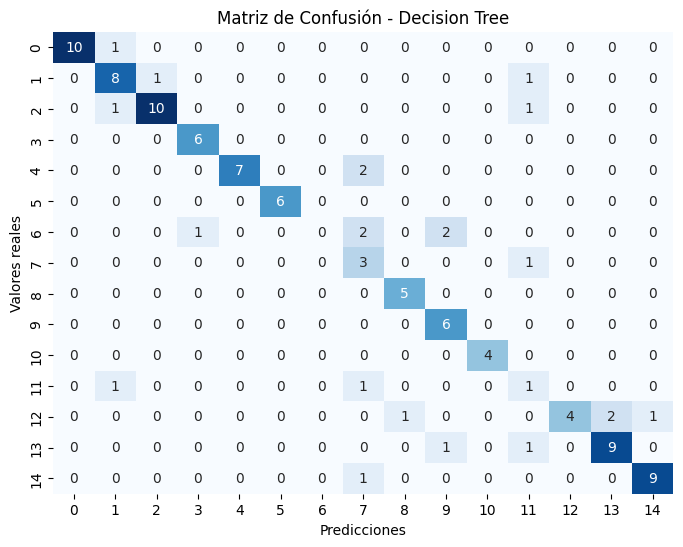

Modelo: K Vecinos Más Cercanos (KNN)
Accuracy: 0.9454545454545454


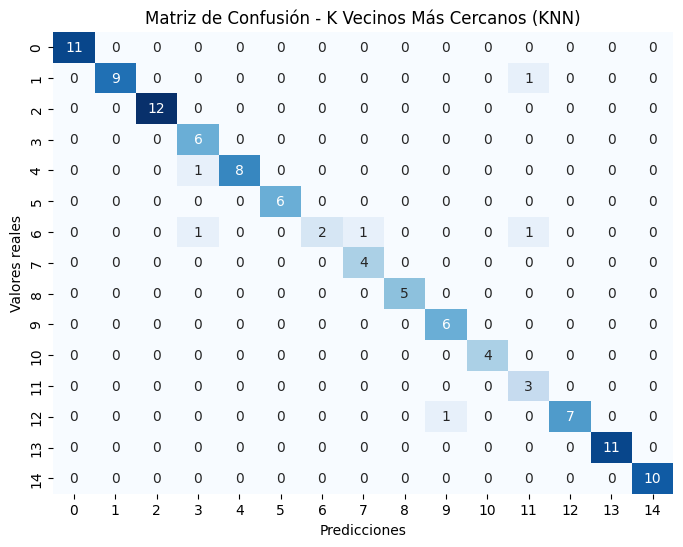

Modelo: Perceptron (MLP)
Accuracy: 0.9181818181818182


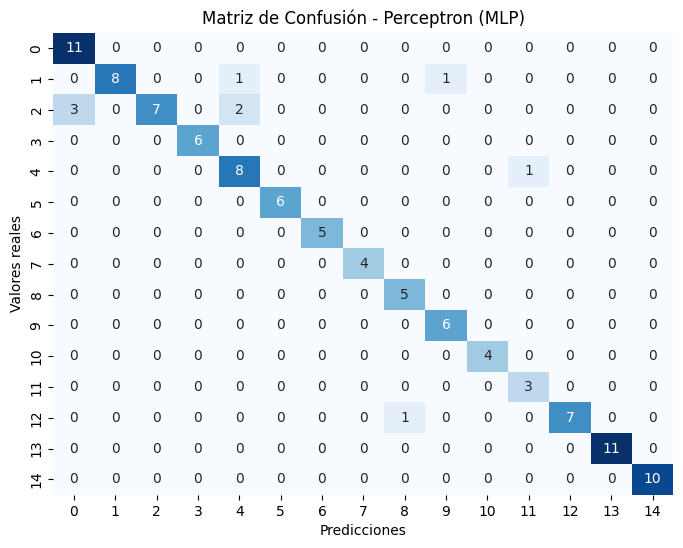

Modelo: Red Convolucional
Accuracy: 0.990909090909091


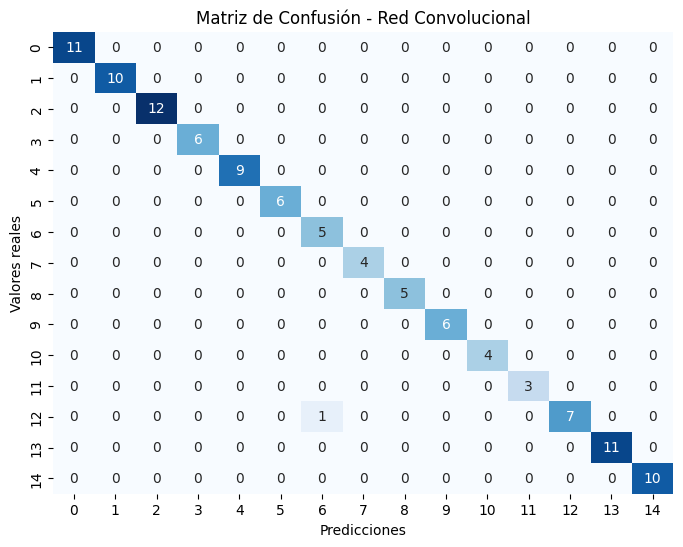

Modelo: Red Preentrenada ResNet50
Accuracy: 0.03636363636363636


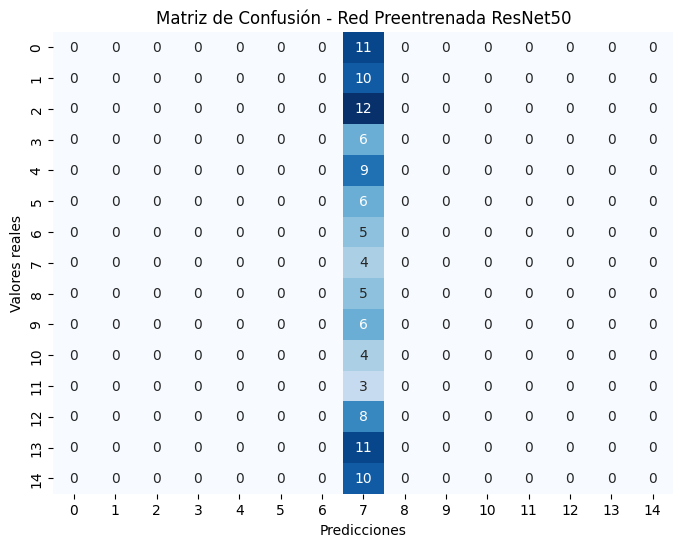

Modelo: Red Preentrenada EfficientNet
Accuracy: 0.5272727272727272


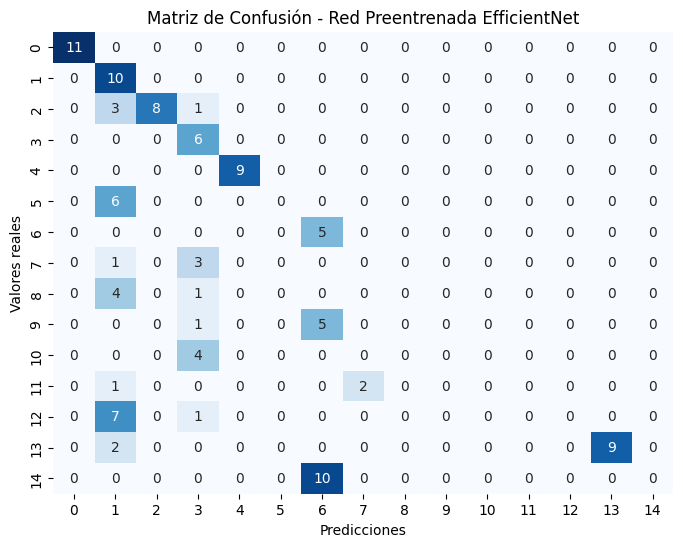

Modelo: Regresión Logística
Accuracy: 1.0


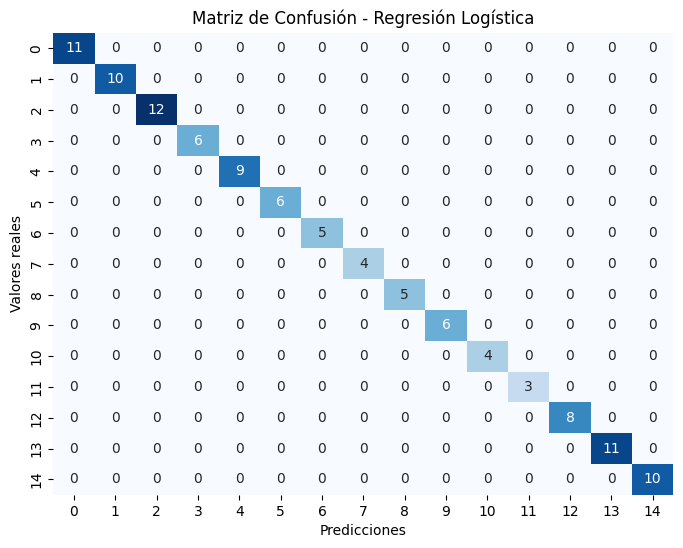

Modelo: Árbol de Decisión
Accuracy: 0.8181818181818182


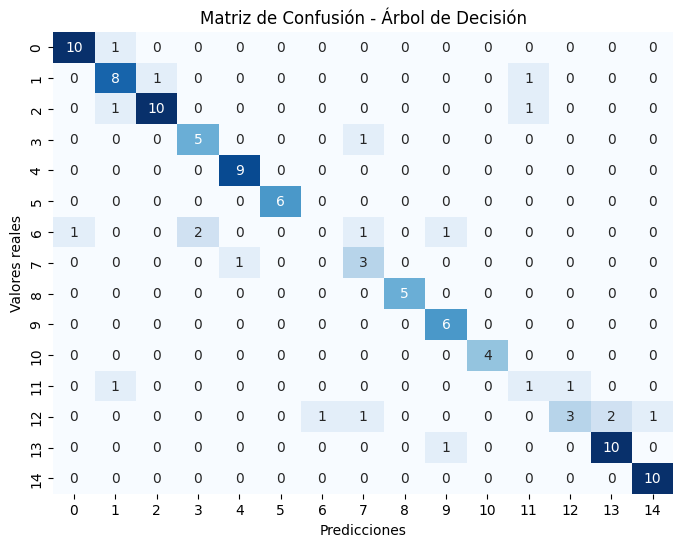

In [26]:
evaluar_modelo(y_test, nb_pred, 'Naive Bayes')
evaluar_modelo(y_test, dt_pred, 'Decision Tree')
evaluar_modelo(y_test, knn_pred, 'K Vecinos Más Cercanos (KNN)')
evaluar_modelo(y_test, mlp_pred, 'Perceptron (MLP)')
evaluar_modelo(y_test, cnn_pred, 'Red Convolucional')
evaluar_modelo(y_test, resnet_pred, 'Red Preentrenada ResNet50')
evaluar_modelo(y_test, effnet_pred, 'Red Preentrenada EfficientNet')
evaluar_modelo(y_test, lr_pred, 'Regresión Logística')
evaluar_modelo(y_test, dtree_pred, 'Árbol de Decisión')
